**Overview**

In this notebook, we will use descriptive stats to get a basic understanding of the literacy rate data for each district in your education dataset.

In [4]:
%pip install scipy
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/07/cb/d5ca5638e795d278776eab69cad55c23accb5c791f86f022d1cdf7e8439f/statsmodels-0.14.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 6.3 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 30.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
education_districtwise = pd.read_csv('education_districtwise.csv')

In [7]:
#explore the data
education_districtwise.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


In [8]:
#use describe() to compute descriptive stats
education_districtwise['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

In [9]:
education_districtwise['STATNAME'].describe()

count         680
unique         36
top       STATE21
freq           75
Name: STATNAME, dtype: object

In [10]:
#use max() and min() to compute range 
range_overall_li = education_districtwise['OVERALL_LI'].max() - education_districtwise['OVERALL_LI'].min()
range_overall_li

61.540000000000006

For the next part of our analysis, we want to find out if the data on district literacy rate fits a specific type of probability distribution.

In [11]:
education_districtwise = education_districtwise.dropna()

<Axes: >

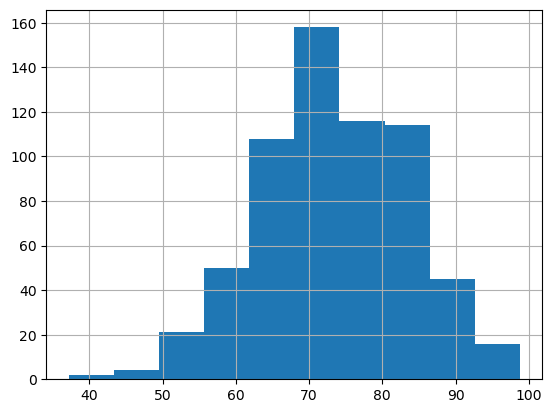

In [12]:
education_districtwise['OVERALL_LI'].hist()

### Normal distribution


The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot. Recall that the **normal distribution** is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data. 

In [13]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

The mean district literacy rate is about 73.4%.

In [14]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

The standard deviation is about 10%.

Now, let's compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean. 

To do this, we will first name two new variables: `lower_limit` and `upper_limit`. The lower limit will be one SD *below* the mean, or the mean - (1 * SD). The upper limit will be one SD *above* the mean, or the mean + (1 * SD). To write the code for the calculations, we will use our two previous variables, `mean_overall_li` and `std_overall_li`, for the mean and standard deviation.

Then, we will add a new line of code that tells the computer to decide if each value in the `OVERALL_LI` column is between the lower limit and upper limit. To do this, we will use the relational operators greater than or equal to (`>=`) and less than or equal to (`<=`), and the bitwise operator AND (`&`). Finally, we will use `mean()` to divide the number of values that are within 1 SD of the mean by the total number of values. 


In [15]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

In [16]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

In [17]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

Our values agree quite well with the empirical rule!

Our values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that your data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data.

### Compute z-scores to find outliers

Recall that a **z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution. 

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean. 

To find outliers in the data, we will first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in your dataset. Recall that the `OVERALL_LI` column lists all the district literacy rates.  

Then, we will compute the z-scores using the function `scipy.stats.zscore()`. 

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [18]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that we have computed z-scores for our dataset,we will write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean. Let's use the relational operators greater than (`>`) and less than (`<`), and the bitwise operator OR (`|`). 

In [19]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs *below* the  overall mean literacy rate. 

Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 

# Sampling 

Now imagine that you are asked to *collect* the data on district literacy rates, and that you have limited time to do so. You can only survey 50 randomly chosen districts, instead of the 634 districts included in your original dataset. The goal of your research study is to estimate the mean literacy rate for *all* 634 districts based on your sample of 50 districts. 

In [4]:
education_districtwise = education_districtwise.dropna()

**Simulate random sampling**
*   `n`: Refers to the desired sample size
*   `replace`: Indicates whether you are sampling with or without replacement
*   `random_state`: Refers to the seed of the random number

*   `n`: You're sampling from 50 districts, so your sample size is `50`. 
*   `replace`: For the purpose of our example, you'll sample *with* replacement. `True` indicates sampling with replacement. 
*   `random_state`: Choose an arbitrary number for your random seed. Say, `31208`. 

In [5]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data 

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


**Compute sample mean**

In [6]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

The sample mean for district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts. Remember that the population mean is the literacy rate for *all* districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean. 



In [9]:
#new estimate 
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

74.2478

## The central limit theorem 

Recall that the **central limit theorem** tells you that when the sample size is large enough, the sample mean approaches a normal distribution. And, as you sample more observations from a population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be. 

In this case, the population mean is the overall literacy rate for *all* districts in the nation. Earlier, you found that the population mean literacy rate is 73.39%. Based on sampling, your first estimated sample mean was 74.22%, and your second estimate was 74.24%. Each estimate is relatively close to the population mean. 

### Compute the mean of a sampling distribution with 10,000 samples

Now, imagine you repeat the study 10,000 times and obtain 10,000 point estimates of the mean. In other words, you take 10,000 random samples of 50 districts, and compute the mean for each sample. According to the central limit theorem, the mean of your sampling distribution will be roughly equal to the population mean. 

You can use Python to compute the mean of the sampling distribution with 10,000 samples. 

Let’s go over the code step by step: 


1. Create an empty list to store the sample mean from each sample. Name this `estimate_list`.
2. Set up a for-loop with the `range() `function. The `range()` function generates a sequence of numbers from 1 to 10,000. The loop will run 10,000 times, and iterate over each number in the sequence.
3. Specify what you want to do in each iteration of the loop. The `sample()` function tells the computer to take a random sample of 50 districts with replacement–the argument `n` equals `50`, and the argument `replace` equals `True`. The `append() `function adds a single item to an existing list. In this case, it appends the value of the sample mean to each item in the list. Your code generates a list of 10,000 values, each of which is the sample mean from a random sample. 
4. Create a new data frame for your list of 10,000 estimates. Name a new variable `estimate_df` to store your data frame. 

In [10]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [11]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.4168913

In [12]:
#complete data set
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444796

# Visualize data 

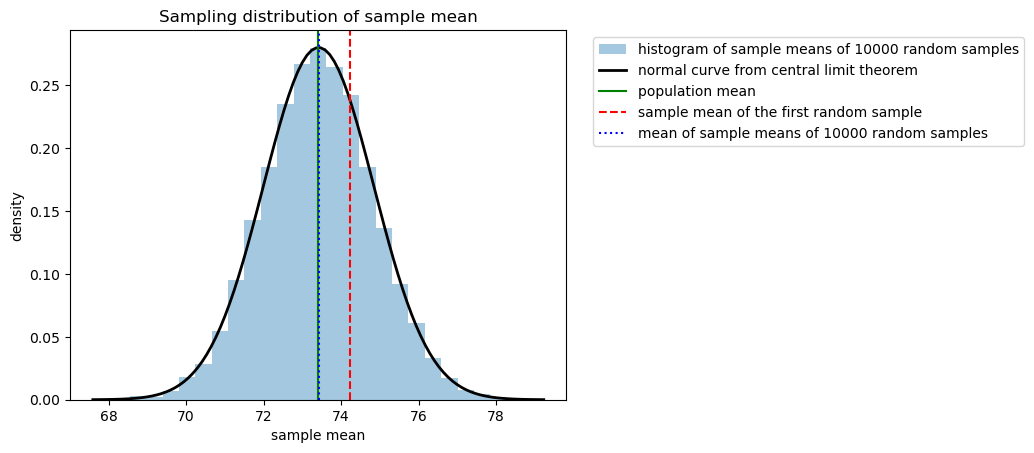

In [13]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

## Hypothesis Test

Use Python to conduct a two-sample hypothesis test.

In [19]:
education_districtwise = education_districtwise.dropna()

In [20]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]
state21

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
133,DISTRICT607,STATE21,14,1357,127,3464228.0,72.03
134,DISTRICT50,STATE21,12,594,86,4138605.0,70.11
135,DISTRICT61,STATE21,16,1919,159,3683896.0,70.43
136,DISTRICT191,STATE21,10,1141,69,4773138.0,58.67
137,DISTRICT328,STATE21,7,1116,85,2335398.0,55.08
...,...,...,...,...,...,...,...
199,DISTRICT587,STATE21,10,1331,119,3682194.0,77.05
201,DISTRICT504,STATE21,13,1469,106,2494533.0,70.38
202,DISTRICT88,STATE21,8,1033,67,1862612.0,66.18
203,DISTRICT427,STATE21,7,805,80,1554203.0,71.10


In [21]:
state28 = education_districtwise[education_districtwise['STATNAME'] == "STATE28"]
state28

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
208,DISTRICT495,STATE28,18,1210,193,3922780.0,58.06
209,DISTRICT208,STATE28,27,1534,251,5082868.0,58.26
210,DISTRICT618,STATE28,5,183,34,656916.0,56.00
211,DISTRICT554,STATE28,17,852,169,3419622.0,53.53
212,DISTRICT642,STATE28,21,1102,241,4476044.0,60.90
213,DISTRICT347,STATE28,11,623,94,2228397.0,59.65
214,DISTRICT4,STATE28,9,990,140,2806200.0,55.10
215,DISTRICT52,STATE28,7,978,131,1690948.0,57.04
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
217,DISTRICT266,STATE28,16,1621,173,3068149.0,53.56


### Simulate random sampling

Now that you have organized your data, use the `sample()` function to take a random sample of 20 districts from each state. First, name a new variable: `sampled_state21`. Then, enter the arguments of the `sample()` function. 

*   `n`: Your sample size is `20`. 
*   `replace`: Choose `True` because you are sampling with replacement.
*   `random_state`: Choose an arbitrary number for the random seed – how about `13490`. 


In [22]:
sampled_state21 = state21.sample(n=20, replace = True, random_state=13490)

In [23]:
sampled_state28 = state28.sample(n=20, replace = True, random_state=39103)

### Compute the sample means

You now have two random samples of 20 districts—one sample for each state. Next, use `mean()` to compute the mean district literacy rate for both STATE21 and STATE28.

In [24]:
sampled_state21['OVERALL_LI'].mean()

70.82900000000001

In [25]:
sampled_state28['OVERALL_LI'].mean()

64.60100000000001

STATE21 has a mean district literacy rate of about 70.8%, while STATE28 has a mean district literacy rate of about 64.6%.

Based on your sample data, the observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points (70.8% - 64.6%). 

**Note**: At this point, you might be tempted to conclude that STATE21 has a higher overall literacy rate than STATE28. However, due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. A hypothesis test can help you determine whether or not your results are statistically significant. 

### Conduct a hypothesis test

Now that you’ve organized your data and simulated random sampling, you’re ready to conduct your hypothesis test. Recall that a two-sample t-test is the standard approach for comparing the means of two independent samples. To review, the steps for conducting a hypothesis test are:

1.   State the null hypothesis and the alternative hypothesis.
2.   Choose a significance level.
3.   Find the p-value. 
4.   Reject or fail to reject the null hypothesis.


#### Step 1: State the null hypothesis and the alternative hypothesis

The **null hypothesis** is a statement that is assumed to be true unless there is convincing evidence to the contrary. The **alternative hypothesis** is a statement that contradicts the null hypothesis and is accepted as true only if there is convincing evidence for it. 

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

We use $H_0$ to denote the null hypothesis and $H_A$ to denote the alternative hypothesis.

*   $H_0$: There is no difference in the mean district literacy rates between STATE21 and STATE28.
*   $H_A$: There is a difference in the mean district literacy rates between STATE21 and STATE28.


#### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The Department of Education asks you to use their standard level of 5%, or 0.05.  

#### Step 3: Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on your sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. Your null hypothesis claims that this difference is due to chance. Your p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater *if* the null hypothesis is true. If the probability of this outcome is very unlikely—in particular, if your p-value is *less than* your significance level of 5%— then you will reject the null hypothesis.

#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, you can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample 
*   `b`: Observations from the second sample
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`. 

**Reference:** [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)


Now write your code and enter the relevant arguments: 

*   `a`: Your first sample refers to the district literacy rate data for STATE21, which is stored in the `OVERALL_LI` column of your variable `sampled_ state21`.
*   `b`: Your second sample refers to the district literacy rate data for STATE28, which is stored in the `OVERALL_LI` column of your variable `sampled_ state28`.
*   `equal_var`: Set to `False` because you don’t want to assume that the two samples have the same variance.


In [26]:
stats.ttest_ind(a=sampled_state21['OVERALL_LI'], b=sampled_state28['OVERALL_LI'], equal_var=False)


TtestResult(statistic=2.8980444277268735, pvalue=0.006421719142765237, df=35.20796133045557)

Your p-value is about 0.0064, or 0.64%. 

This means there is only a 0.64% probability that the absolute difference between the two mean district literacy rates would be 6.2 percentage points or greater if the null hypothesis were true. In other words, it’s highly unlikely that the difference in the two means is due to chance.

#### Step 4: Reject or fail to reject the null hypothesis

To draw a conclusion, compare your p-value with the significance level.

*   If the p-value is less than the significance level, you can conclude that there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you can conclude that there is *not* a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will fail to reject the null hypothesis $H_0$.

Your p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. Therefore, you will *reject* the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28. 

This analysis will help the Department of Education decide how to distribute government resources. Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, STATE28, will likely receive more resources to improve literacy. 